In [26]:
import numpy as np

class Agent: 
    def __init__(self, pos, velo):
        self.pos = pos
        self.velo = velo
        
agents = []

w = 0.5
        
def initialize():
    for i in range(5):
        agents.append(Agent(2*np.random.random((1,2)),2*np.random.random((1,2))))
    

    
def find_nearest_neighbor(aj): 
    distances = [np.linalg.norm(aj.velo - ai.velo) for ai in agents_tmp]
    distances[distances.index(0.0)] = max(distances)
    return(agents[distances.index(min(distances))])
    
initialize()
simulation_steps = 10
for i in range(simulation_steps):
    agents_tmp = agents.copy()
    print("step : ", i, "\n", [agent.pos for agent in agents])
    for aj in agents:
        ai = find_nearest_neighbor(aj)
        aj.velo += w*aj.velo
        aj.velo = (aj.velo / np.linalg.norm(aj.velo))
        aj.pos += aj.velo

step :  0 
 [array([[ 1.00660296,  0.85790137]]), array([[ 1.16392054,  0.40781742]]), array([[ 1.52270127,  0.41450711]]), array([[ 1.01648599,  1.17881042]]), array([[ 0.23881479,  1.39085992]])]
step :  1 
 [array([[ 1.27682366,  1.82069977]]), array([[ 1.47689457,  1.3575791 ]]), array([[ 1.79192879,  1.37758371]]), array([[ 1.97545966,  1.46230555]]), array([[ 1.15964968,  1.78081261]])]
step :  2 
 [array([[ 1.54704436,  2.78349818]]), array([[ 1.78986861,  2.30734078]]), array([[ 2.06115631,  2.34066031]]), array([[ 2.93443334,  1.74580068]]), array([[ 2.08048457,  2.17076531]])]
step :  3 
 [array([[ 1.81726506,  3.74629659]]), array([[ 2.10284264,  3.25710247]]), array([[ 2.33038384,  3.30373692]]), array([[ 3.89340701,  2.02929581]]), array([[ 3.00131946,  2.560718  ]])]
step :  4 
 [array([[ 2.08748575,  4.709095  ]]), array([[ 2.41581667,  4.20686415]]), array([[ 2.59961136,  4.26681352]]), array([[ 4.85238069,  2.31279095]]), array([[ 3.92215435,  2.9506707 ]])]
step :  5 

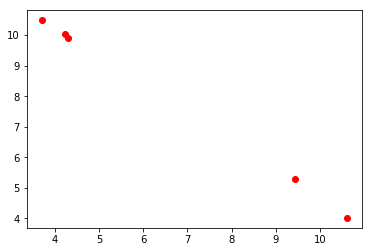

In [43]:
from matplotlib import pyplot as plt
def show(agents):
    positions = [agent.pos for agent in agents]
    x = [pos[0][0] for pos in positions]
    y = [pos[0][1] for pos in positions]
    plt.plot(x, y, 'ro')
    plt.show()
show(agents)

7x8